<a href="https://colab.research.google.com/github/maciejlehmann/175IC-machine-learning/blob/main/Zad_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples=1000, centers=3, random_state=42)
df = pd.DataFrame(data, columns=['x1', 'x2'])
px.scatter(df, 'x1', 'x2', template='plotly_dark')

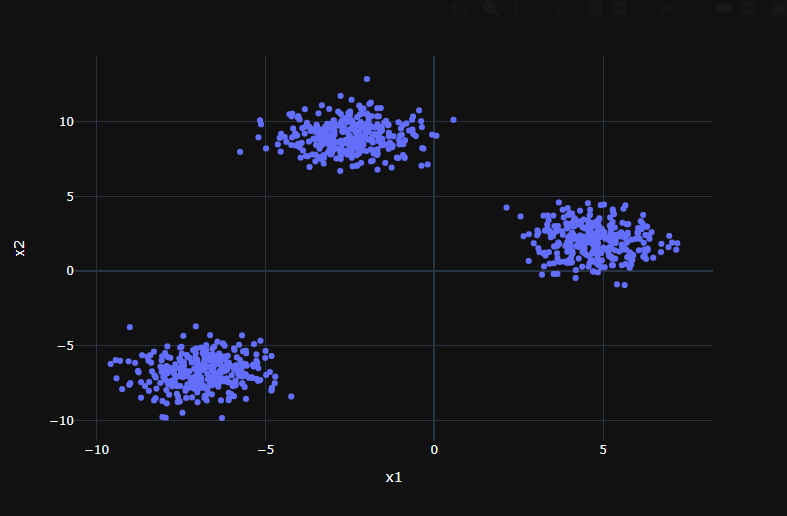

In [3]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=0.3, min_samples=5)
cluster.fit(data)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [5]:
df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', template='plotly_dark', color_continuous_midpoint=0)

In [7]:
df['cluster'].value_counts()

 2    260
 1    258
 0    255
-1    189
 4      9
 3      7
 8      6
 7      6
 6      5
 5      5
Name: cluster, dtype: int64

In [35]:
data, _ = make_blobs(n_samples=1000, centers=4, random_state=91, cluster_std=1.6)
df = pd.DataFrame(data, columns=['x1', 'x2'])
cluster = DBSCAN(eps=0.4, min_samples=5)
cluster.fit(data)

df['cluster'] = cluster.labels_
px.scatter(df, 'x1', 'x2', 'cluster', template='plotly_dark', color_continuous_midpoint=0)

In [36]:
df['cluster'].value_counts()

-1     309
 2     171
 3     149
 0     147
 1      76
 6      26
 5      18
 16      9
 9       8
 18      7
 8       7
 19      7
 15      6
 4       6
 12      6
 11      5
 10      5
 13      5
 14      5
 7       5
 17      5
 20      5
 21      5
 23      4
 22      4
Name: cluster, dtype: int64

In [39]:
from sklearn.cluster import KMeans

k_means_cluster = KMeans(n_clusters=4,random_state=91)
k_means_cluster.fit(df)
df['k_means'] = k_means_cluster.labels_
px.scatter(df, 'x1', 'x2', 'k_means', template='plotly_dark', color_continuous_midpoint = 0)

In [40]:
df['k_means'].value_counts()

1    454
3    254
0    214
2     78
Name: k_means, dtype: int64

In [46]:
print('DBSCAN:')
dbscan = df['cluster'].value_counts()[1:5].sort_index()
print(dbscan)

print('\nK-Means:')
kmeans = df['k_means'].value_counts().sort_index()
print(kmeans)

DBSCAN:
0    147
1     76
2    171
3    149
Name: cluster, dtype: int64

K-Means:
0    214
1    454
2     78
3    254
Name: k_means, dtype: int64
